 Copyright (C)                                                       
 2016 - 2019 Pinard Liu(liujianping-ok@163.com) 
 
 https://www.cnblogs.com/pinard
 
 Permission given to modify the code as long as you keep this declaration at the top                               

用scikit-learn和pandas学习Ridge回归
https://www.cnblogs.com/pinard/p/6023000.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [3]:
print np.arange(1, 11)
print np.arange(0, 10)[:, np.newaxis]   

[ 1  2  3  4  5  6  7  8  9 10]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [4]:
print np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]


In [11]:
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)


In [13]:
n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-10, -2, n_alphas)
print alphas

[  1.00000000e-10   1.09698580e-10   1.20337784e-10   1.32008840e-10
   1.44811823e-10   1.58856513e-10   1.74263339e-10   1.91164408e-10
   2.09704640e-10   2.30043012e-10   2.52353917e-10   2.76828663e-10
   3.03677112e-10   3.33129479e-10   3.65438307e-10   4.00880633e-10
   4.39760361e-10   4.82410870e-10   5.29197874e-10   5.80522552e-10
   6.36824994e-10   6.98587975e-10   7.66341087e-10   8.40665289e-10
   9.22197882e-10   1.01163798e-09   1.10975250e-09   1.21738273e-09
   1.33545156e-09   1.46497140e-09   1.60705282e-09   1.76291412e-09
   1.93389175e-09   2.12145178e-09   2.32720248e-09   2.55290807e-09
   2.80050389e-09   3.07211300e-09   3.37006433e-09   3.69691271e-09
   4.05546074e-09   4.44878283e-09   4.88025158e-09   5.35356668e-09
   5.87278661e-09   6.44236351e-09   7.06718127e-09   7.75259749e-09
   8.50448934e-09   9.32930403e-09   1.02341140e-08   1.12266777e-08
   1.23155060e-08   1.35099352e-08   1.48202071e-08   1.62575567e-08
   1.78343088e-08   1.95639834e-08

In [14]:
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    clf.set_params(alpha=a)
    #针对每个alpha做ridge回归
    clf.fit(X, y)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(clf.coef_)

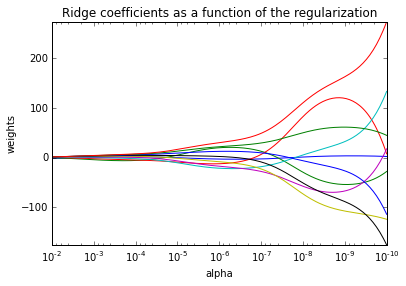

In [18]:
ax = plt.gca()

ax.plot(alphas, coefs)
#将alpha的值取对数便于画图
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()